# Funciones de distribución de probabilidad

## Distribución Uniforme

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
a = 1
b = 100
n = 1000000 #la muestra
data = np.random.uniform(a, b, n)

(array([100069., 100262.,  99880.,  99289., 100373., 100160.,  99749.,
         99676., 100350., 100192.]),
 array([ 1.00002241, 10.90000874, 20.79999507, 30.69998141, 40.59996774,
        50.49995408, 60.39994041, 70.29992675, 80.19991308, 90.09989941,
        99.99988575]),
 <a list of 10 Patch objects>)

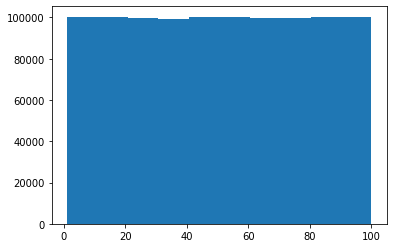

In [12]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [17]:
data = np.random.randn(1000000)

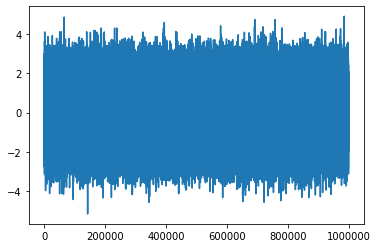

In [18]:
x = range(1,1000001)
plt.plot(x, data)

(array([2.10000e+01, 6.87000e+02, 1.50280e+04, 1.11226e+05, 3.22159e+05,
        3.62960e+05, 1.59284e+05, 2.67960e+04, 1.79200e+03, 4.70000e+01]),
 array([-5.18426401, -4.17289228, -3.16152055, -2.15014882, -1.13877709,
        -0.12740535,  0.88396638,  1.89533811,  2.90670984,  3.91808157,
         4.9294533 ]),
 <a list of 10 Patch objects>)

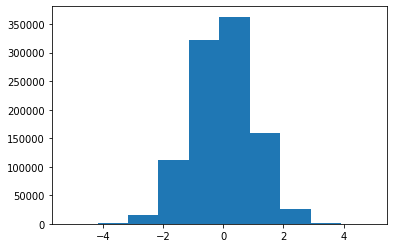

In [19]:
plt.hist(data)

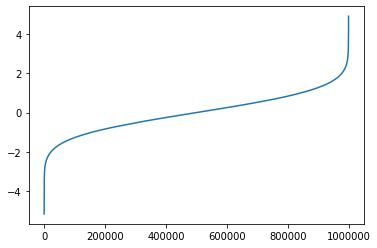

In [20]:
plt.plot(x, sorted(data)) #dibujarlo organizado

(array([  12.,   98.,  484., 1341., 2482., 2829., 1830.,  723.,  169.,
          32.]),
 array([-3.88743116, -2.07573754, -0.26404393,  1.54764969,  3.3593433 ,
         5.17103691,  6.98273053,  8.79442414, 10.60611776, 12.41781137,
        14.22950499]),
 <a list of 10 Patch objects>)

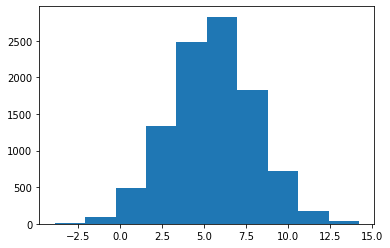

In [23]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd * Z #Z = (X - mu) / sd -> N(0,1), x = mu + sd * Z (Z es la normal estándar)
plt.hist(data)

In [25]:
data = np.random.randn(2,4) #2 colleciones de 4 elementos cada una
data

array([[ 2.10035012,  0.40396987, -0.35074644, -0.31727348],
       [-1.18286799, -1.31627102,  0.37669902, -1.64460187]])

## La simulación de Monte Carlo 

* Generamos dos números aleatorios x e y entre 0 y 1, en total 1000 veces
* calcularemos xx + yy
    * si el valor es inferior a 1 --> estamos dentro del círculo
    * si el calor es superior a 1 --> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo. 
* Usamos dicha probabilidad para aproximar el valor de Pi.
* Repetimos el experimento un número suficiente de veces por ej 100, para obtener 100 diferentes aproximaciones de Pi.
* Calculamos el promedio de los 10000 experimentos anteriores para dar un valor final a Pi.

In [44]:
#Se generan 1000 puntos que pueden estar dentro o fuera del círdulo y  lo repito 100 veces
def pi_montecarlo(n, num_exp):
    pi_avg = 0   
    pi_value_list = []
    for i in range(num_exp): # promedio de 100 valores
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/num_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141373999999999


(3.141373999999999, [<matplotlib.lines.Line2D at 0x15f6c0cc648>])

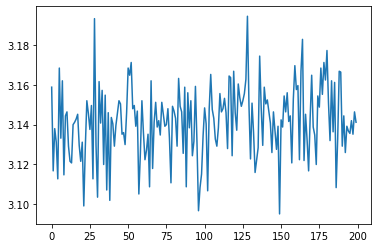

In [45]:
pi_montecarlo(10000, 200)